# Imports

## Import built-in functions and libraries

Import plotting utility and set default settings

In [1]:
using Plots # plotting utility
default(framestyle = :box, grid = false, foreground_color_legend = nothing, background_color_legend = nothing, linewidth = 1.5, legendfontsize = 10)

## Import custom functions and libraries

Import BinodalPE.jl, which automatically loads and imports all required custom files and functions

In [2]:
using BinodalPE

# Test varsolve

Run the code to generate a plot of $\alpha_{\mathrm{A}+}$ vs $\phi_{\mathrm{A}}$ multiple times in a for loop; the solution fails at different points each time

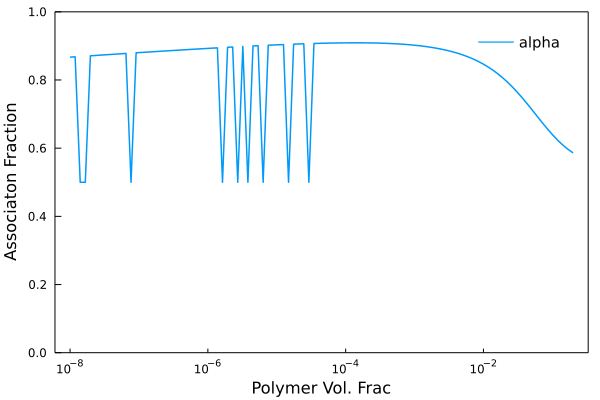

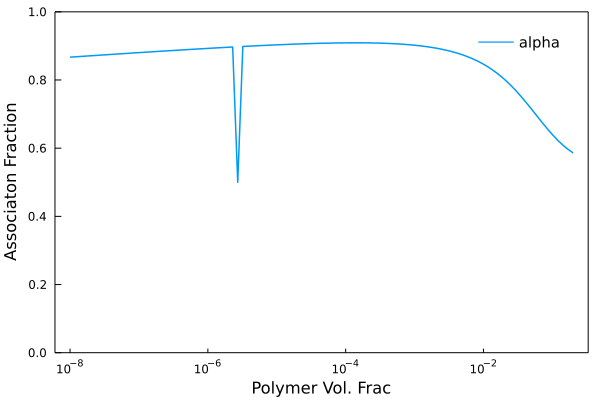

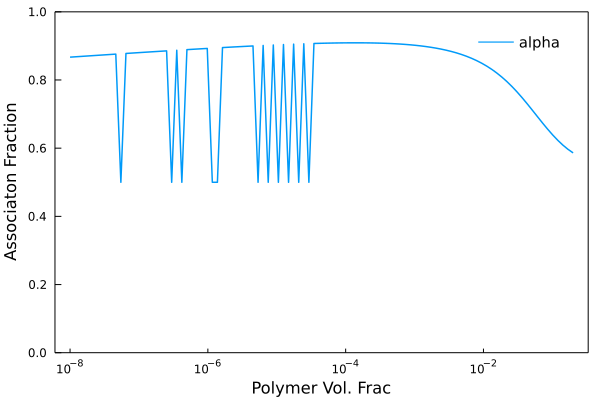

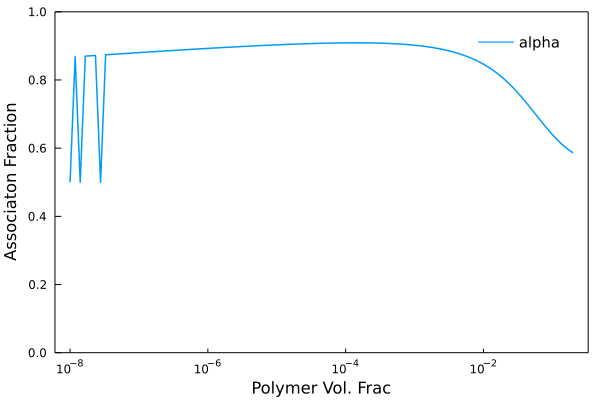

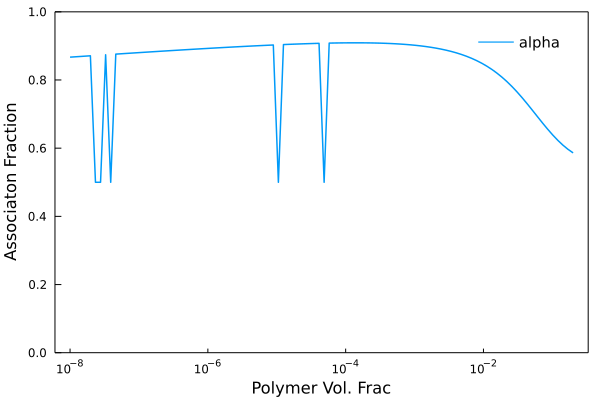

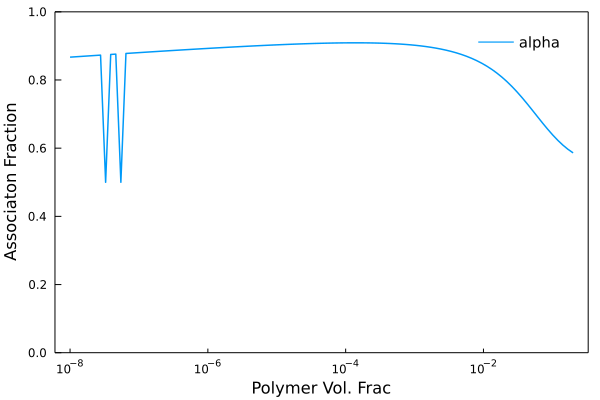

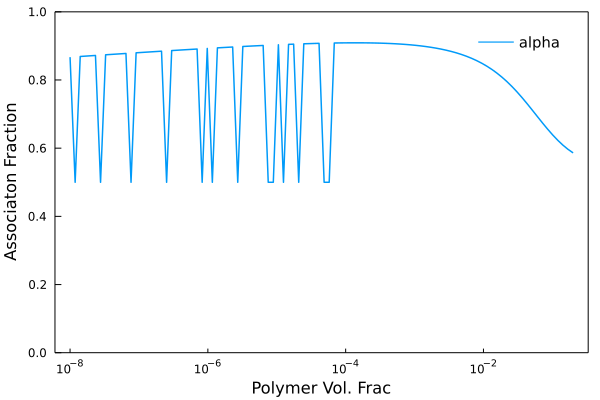

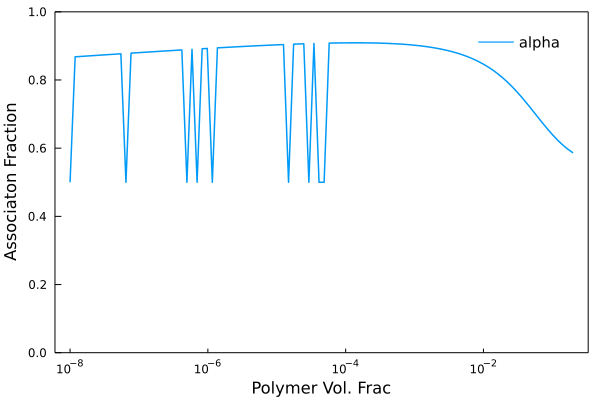

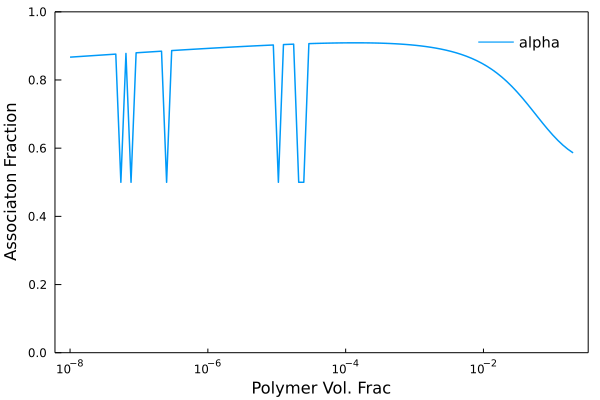

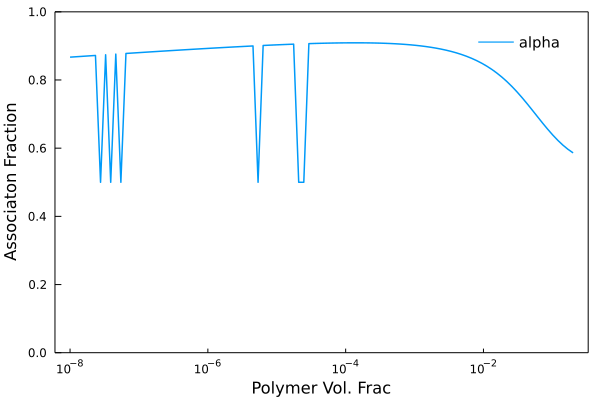

In [3]:
SinglePolyionModel = SinglePolyion(structure = GaussianCoil)
phivector = 10 .^ LinRange{Float64}(-8,log10(0.2),100)
alpha = similar(phivector)
for _ = 1:10
    for (i,phitest) in enumerate(phivector)
        alpha[i] = varsolve(neutralbulk([phitest,0.00],SinglePolyionModel),SinglePolyionModel, show_trace=false, extended_trace=true)[1]
    end
    fig = plot(xlabel = "Polymer Vol. Frac", ylabel = "Associaton Fraction", xscale = :log10)
    plot!(fig,phivector,alpha,label="alpha",ylim = (0,1))
    display(fig)
end